In [20]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [21]:
data = pd.read_csv("LoanApprovalPrediction.csv") 

**Data Exploration** 

In [22]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [23]:
data.shape

(598, 13)

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            598 non-null    object 
 1   Gender             598 non-null    object 
 2   Married            598 non-null    object 
 3   Dependents         586 non-null    float64
 4   Education          598 non-null    object 
 5   Self_Employed      598 non-null    object 
 6   ApplicantIncome    598 non-null    int64  
 7   CoapplicantIncome  598 non-null    float64
 8   LoanAmount         577 non-null    float64
 9   Loan_Amount_Term   584 non-null    float64
 10  Credit_History     549 non-null    float64
 11  Property_Area      598 non-null    object 
 12  Loan_Status        598 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 60.9+ KB


In [25]:
#Printing count of categorical variables
obj = (data.dtypes == 'object') 
print("Categorical variables:",len(list(obj[obj].index)))

Categorical variables: 7


In [26]:
#Printing count of numerical variables
obj1 = ((data.dtypes == 'float64') | (data.dtypes == 'int64'))
print("Numerical variable:",len(list(obj1[obj1].index)))

Numerical variable: 6


In [27]:
round(data.describe(),1)

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,586.0,598.0,598.0,577.0,584.0,549.0
mean,0.8,5292.3,1631.5,145.0,341.9,0.8
std,1.0,5807.3,2953.3,82.7,65.2,0.4
min,0.0,150.0,0.0,9.0,12.0,0.0
25%,0.0,2877.5,0.0,100.0,360.0,1.0
50%,0.0,3806.0,1211.5,127.0,360.0,1.0
75%,1.8,5746.0,2324.0,167.0,360.0,1.0
max,3.0,81000.0,41667.0,650.0,480.0,1.0


In [28]:
data.describe(include='object')

,Loan_ID,Gender,Married,Education,Self_Employed,Property_Area,Loan_Status
count,598,598,598,598,598,598,598
unique,598,2,2,2,2,3,2
top,LP001002,Male,Yes,Graduate,No,Semiurban,Y
freq,1,487,388,465,488,225,411


In [29]:
for feature in list(data.columns):
    print("{} has {} unique values".format(feature,data[feature].nunique()))
    print(data[feature].unique())
    print(" ")

Loan_ID has 598 unique values
['LP001002' 'LP001003' 'LP001005' 'LP001006' 'LP001008' 'LP001011'
 'LP001013' 'LP001014' 'LP001018' 'LP001020' 'LP001024' 'LP001027'
 'LP001028' 'LP001029' 'LP001030' 'LP001032' 'LP001034' 'LP001036'
 'LP001038' 'LP001041' 'LP001043' 'LP001046' 'LP001047' 'LP001052'
 'LP001066' 'LP001068' 'LP001073' 'LP001086' 'LP001087' 'LP001091'
 'LP001095' 'LP001097' 'LP001098' 'LP001100' 'LP001106' 'LP001109'
 'LP001112' 'LP001114' 'LP001116' 'LP001119' 'LP001120' 'LP001123'
 'LP001131' 'LP001136' 'LP001137' 'LP001138' 'LP001144' 'LP001146'
 'LP001151' 'LP001155' 'LP001157' 'LP001164' 'LP001179' 'LP001186'
 'LP001194' 'LP001195' 'LP001197' 'LP001198' 'LP001199' 'LP001205'
 'LP001206' 'LP001207' 'LP001213' 'LP001222' 'LP001225' 'LP001228'
 'LP001233' 'LP001238' 'LP001241' 'LP001243' 'LP001245' 'LP001248'
 'LP001250' 'LP001253' 'LP001255' 'LP001256' 'LP001259' 'LP001263'
 'LP001264' 'LP001265' 'LP001266' 'LP001267' 'LP001273' 'LP001275'
 'LP001279' 'LP001280' 'LP001282

In [30]:
#Removing Loan_ID from the dataset as it has unique values 
data.drop(['Loan_ID'],axis=1,inplace=True)

In [31]:
data.shape

(598, 12)

**Data Cleaning**

In [32]:
data.duplicated().sum()

0

In [33]:
data.isnull().sum()

Gender                0
Married               0
Dependents           12
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

In [34]:
data_missing=data.isna().sum()*100/len(data)
print('Missing Values in Percentages')
data_missing

Missing Values in Percentages


Gender               0.000000
Married              0.000000
Dependents           2.006689
Education            0.000000
Self_Employed        0.000000
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.511706
Loan_Amount_Term     2.341137
Credit_History       8.193980
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [35]:
#Filling NAN values with mean loan amount
data.LoanAmount = data.LoanAmount.fillna(data.LoanAmount.mean())

In [36]:
#Filling categorical variables with mode values
data['Dependents'].fillna(data['Dependents'].mode()[0], inplace = True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0], inplace = True)
data['Credit_History'].fillna(data['Credit_History'].mode()[0], inplace = True)

In [37]:
#Checking count of NaN values
data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

**Data Vizualization**

Gender
Male      487
Female    111
Name: count, dtype: int64


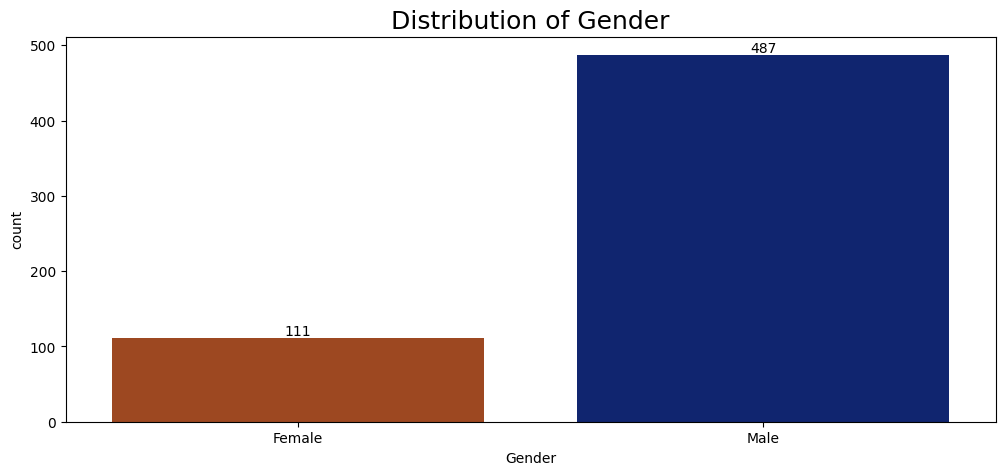

In [38]:
print(data.Gender.value_counts())
plt.figure(figsize=(12, 5))
Gender = sorted(data.Gender.unique().tolist())
g = sns.countplot(x='Gender', data=data, hue='Gender', order=Gender ,palette='dark')
plt.title('Distribution of Gender', fontsize=18)
for i in g.containers:
    g.bar_label(i,)

Property_Area
Semiurban    225
Urban        198
Rural        175
Name: count, dtype: int64


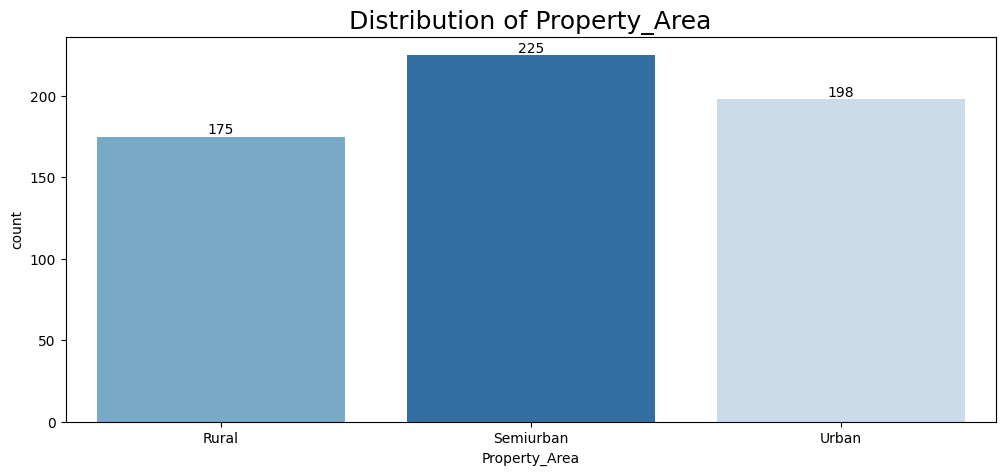

In [39]:
print(data.Property_Area.value_counts())
plt.figure(figsize=(12, 5))
Property_Area = sorted(data.Property_Area.unique().tolist())
g = sns.countplot(x='Property_Area', data=data, hue='Property_Area', order=Property_Area ,palette='Blues')
plt.title('Distribution of Property_Area', fontsize=18)
for i in g.containers:
    g.bar_label(i,)

Education
Graduate        465
Not Graduate    133
Name: count, dtype: int64


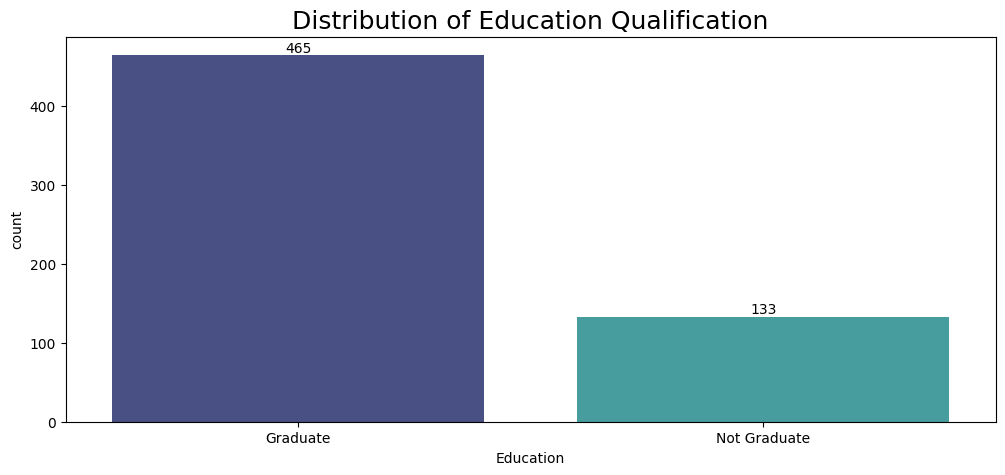

In [40]:
print(data.Education.value_counts())
plt.figure(figsize=(12, 5))
Education = sorted(data.Education.unique().tolist())
g = sns.countplot(x='Education', data=data, hue='Education', order=Education ,palette='mako')
plt.title('Distribution of Education Qualification', fontsize=18)
for i in g.containers:
    g.bar_label(i,)

Self_Employed
No     488
Yes    110
Name: count, dtype: int64


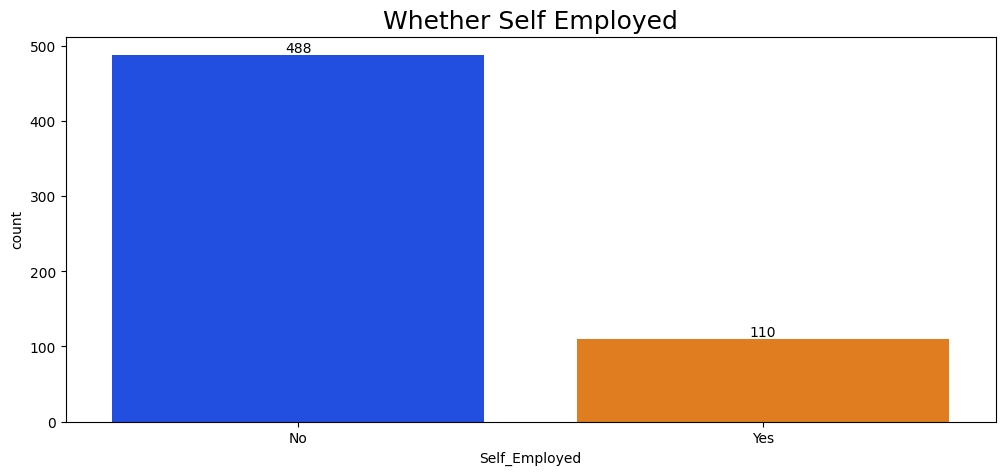

In [41]:
print(data.Self_Employed.value_counts())
plt.figure(figsize=(12, 5))
Self_Employed = sorted(data.Self_Employed.unique().tolist())
g = sns.countplot(x='Self_Employed', data=data, hue='Self_Employed', order=Self_Employed ,palette='bright')
plt.title('Whether Self Employed', fontsize=18)
for i in g.containers:
    g.bar_label(i,)

Text(0.5, 1.0, 'Distribution of Applicant Income')

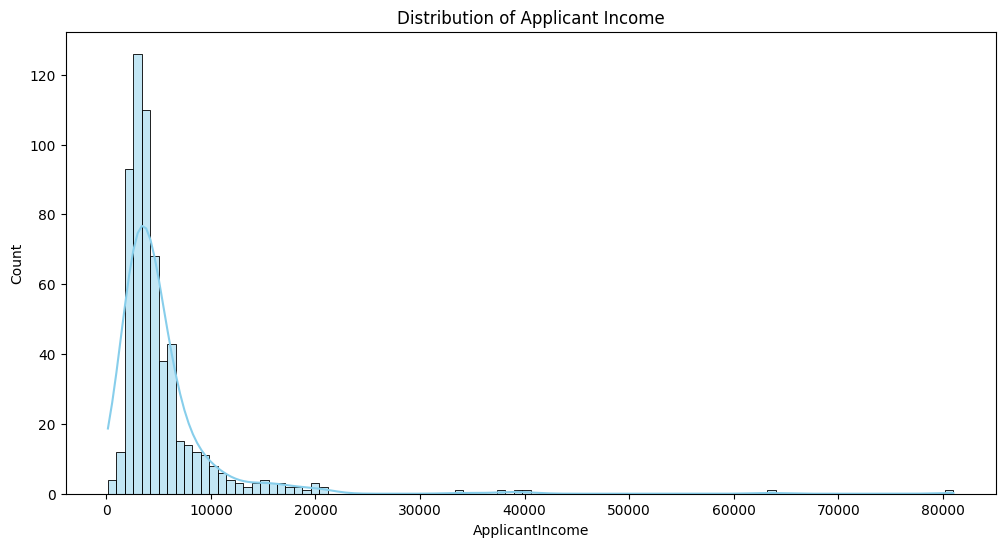

In [42]:
plt.figure(figsize=(12, 6))

# Create a histogram using Seaborn
sns.histplot(data['ApplicantIncome'], bins=100, kde=True, color='skyblue')
plt.title("Distribution of Applicant Income")

Text(0.5, 1.0, 'Distribution of Loan Amount')

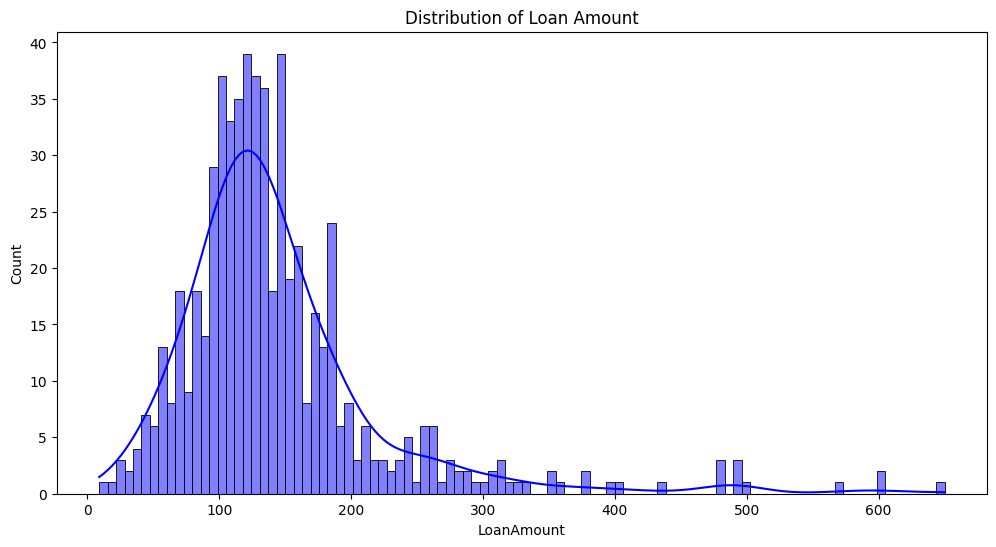

In [43]:
plt.figure(figsize=(12, 6))

# Create a histogram using Seaborn
sns.histplot(data['LoanAmount'], bins=100, kde=True, color='blue')
plt.title("Distribution of Loan Amount")

Text(0.5, 1.0, 'Distribution of Co Applicant Income')

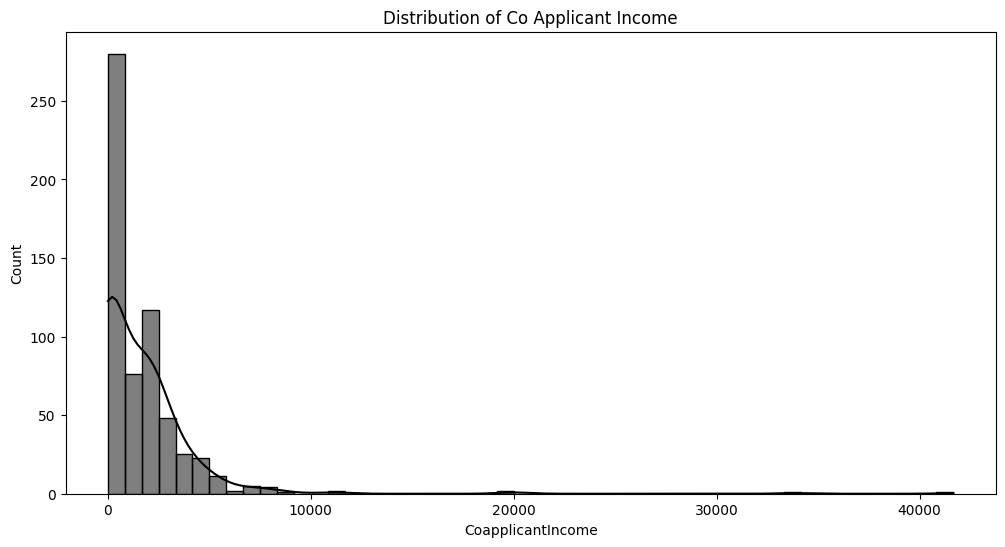

In [44]:
plt.figure(figsize=(12, 6))

# Create a histogram using Seaborn
sns.histplot(data['CoapplicantIncome'], bins=50, kde=True, color='black')
plt.title("Distribution of Co Applicant Income")

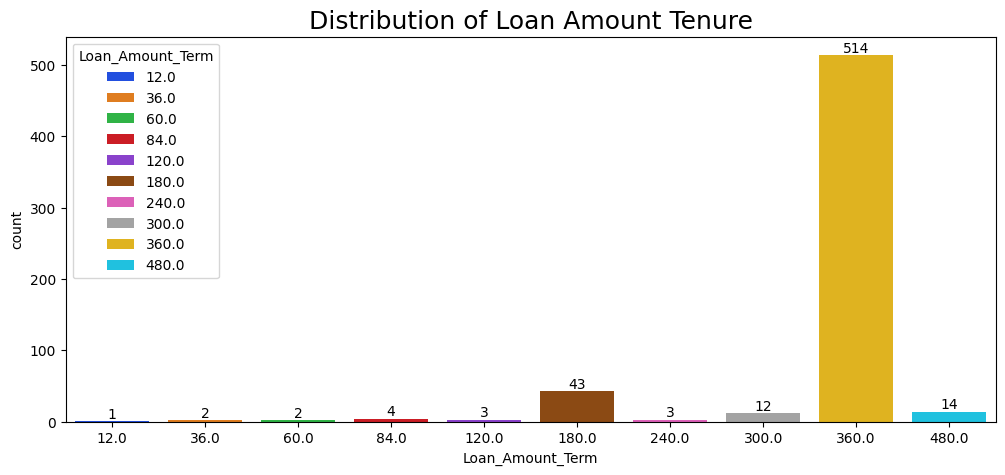

In [45]:
plt.figure(figsize=(12, 5))
Loan_Amount_Term = sorted(data.Loan_Amount_Term.unique().tolist())
g = sns.countplot(x='Loan_Amount_Term', data=data, hue='Loan_Amount_Term', order=Loan_Amount_Term ,palette='bright')
plt.title('Distribution of Loan Amount Tenure', fontsize=18)
for i in g.containers:
    g.bar_label(i,)

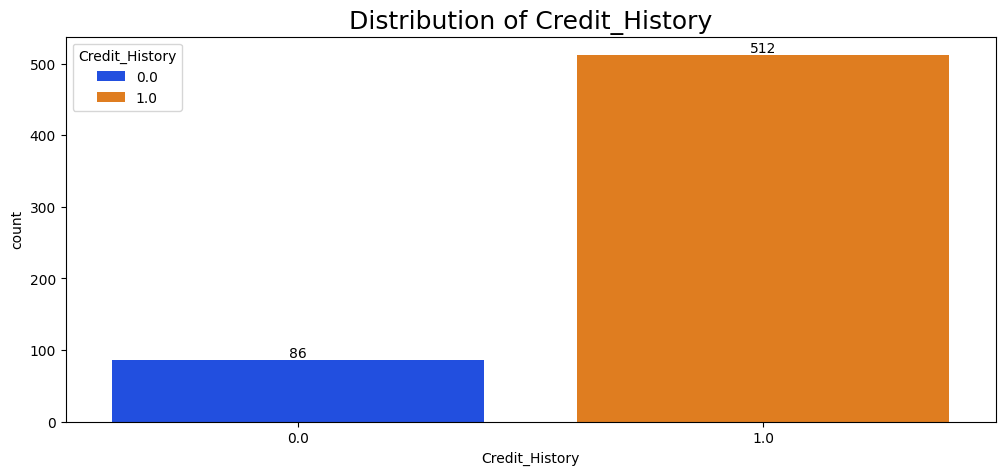

In [46]:
plt.figure(figsize=(12, 5))
Credit_History = sorted(data.Credit_History.unique().tolist())
g = sns.countplot(x='Credit_History', data=data, hue='Credit_History', order=Credit_History ,palette='bright')
plt.title('Distribution of Credit_History', fontsize=18)
for i in g.containers:
    g.bar_label(i,)

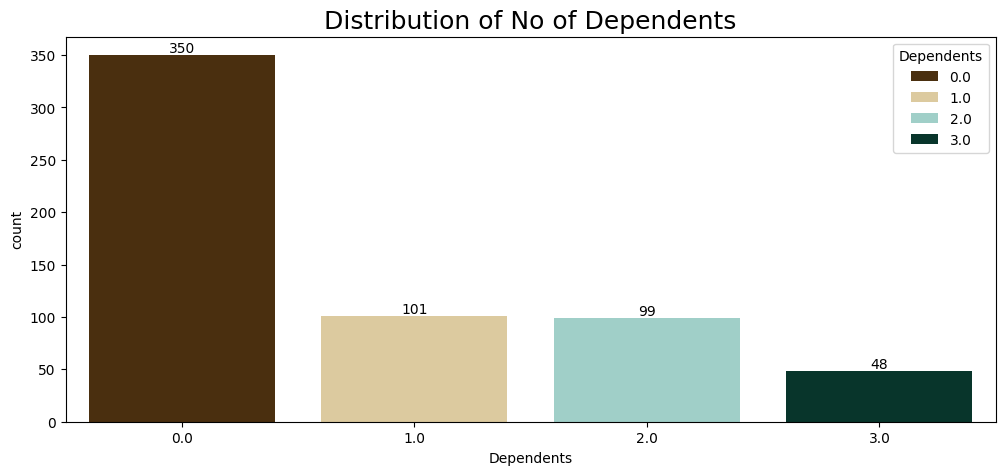

In [47]:
plt.figure(figsize=(12, 5))
Dependents = sorted(data.Dependents.unique().tolist())
g = sns.countplot(x='Dependents', data=data, hue='Dependents', order=Dependents ,palette='BrBG')
plt.title('Distribution of No of Dependents', fontsize=18)
for i in g.containers:
    g.bar_label(i,)

In [48]:
print("Number of people who take loan group by Loan Amount:")
print(data['LoanAmount'].value_counts())

Number of people who take loan group by Loan Amount:
LoanAmount
144.968804    21
120.000000    20
110.000000    16
100.000000    15
187.000000    12
              ..
72.000000      1
240.000000     1
214.000000     1
59.000000      1
253.000000     1
Name: count, Length: 200, dtype: int64


In [49]:
# Import label encoder 
from sklearn import preprocessing 
	
# label_encoder object knows how 
# to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
obj = (data.dtypes == 'object') 
for col in list(obj[obj].index): 
    data[col] = label_encoder.fit_transform(data[col])

In [50]:
# To find the number of columns with 
# datatype==object 
obj = (data.dtypes == 'object') 
print("Categorical variables:",len(list(obj[obj].index)))

Categorical variables: 0


In [63]:
from sklearn.preprocessing import StandardScaler

ss=StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

<Axes: >

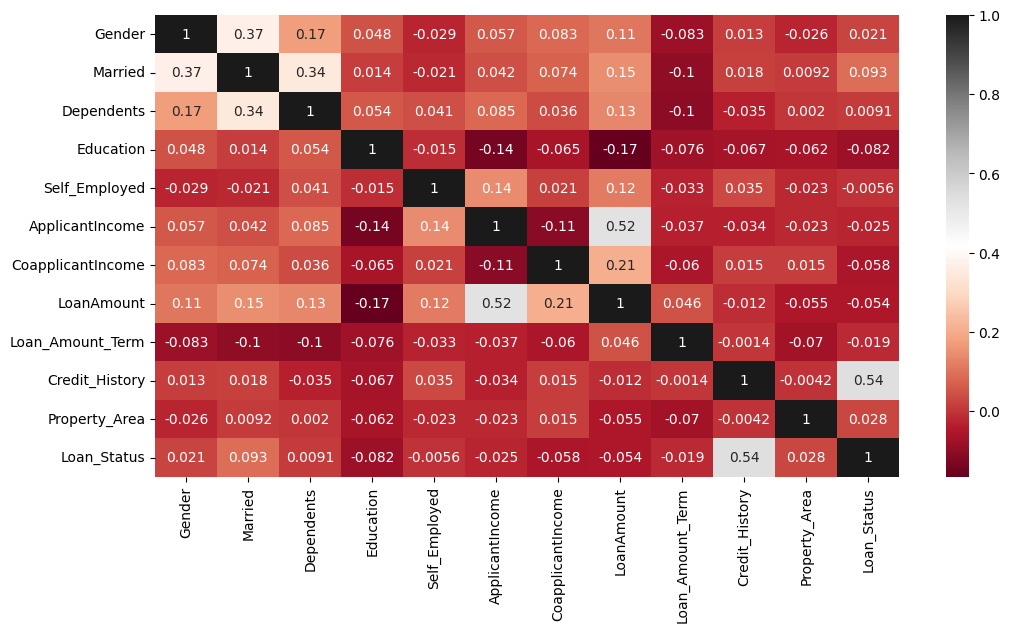

In [64]:
plt.figure(figsize=(12,6)) 

sns.heatmap(data.corr(),annot=True,cmap='RdGy')

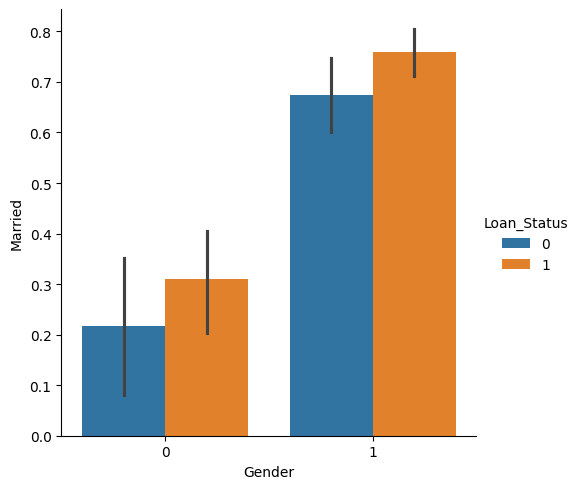

In [65]:
sns.catplot(x="Gender", y="Married", 
			hue="Loan_Status", 
			kind="bar", 
			data=data)

In [66]:
from sklearn.model_selection import train_test_split 

X = data.drop(['Loan_Status'],axis=1) 
Y = data['Loan_Status'] 
X.shape,Y.shape 

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
													test_size=0.4, 
													random_state=1) 
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape


((358, 11), (240, 11), (358,), (240,))

In [67]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.svm import SVC 
from sklearn.linear_model import LogisticRegression 
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

from sklearn import metrics 

knn = KNeighborsClassifier() 
rfc = RandomForestClassifier(n_estimators = 7, 
							criterion = 'entropy', 
							random_state =7) 
svc = SVC() 
lc = LogisticRegression(max_iter=170) 
gb = GaussianNB()
dt = DecisionTreeClassifier()


In [68]:
# making predictions on the training set 
for clf in (rfc, knn, svc,lc,gb,dt): 
	clf.fit(X_train, Y_train) 
	Y_pred = clf.predict(X_train) 
	print("Accuracy score of ", 
		clf.__class__.__name__, 
		"=",100*metrics.accuracy_score(Y_train, 
										Y_pred))

Accuracy score of  RandomForestClassifier = 96.08938547486034
Accuracy score of  KNeighborsClassifier = 71.22905027932961
Accuracy score of  SVC = 68.71508379888269
Accuracy score of  LogisticRegression = 80.44692737430168
Accuracy score of  GaussianNB = 79.05027932960894
Accuracy score of  DecisionTreeClassifier = 100.0


In [69]:
# making predictions on the testing set 
for clf in (rfc, knn, svc,lc,gb,dt): 
	clf.fit(X_train, Y_train) 
	Y_pred = clf.predict(X_test) 
	print("Accuracy score of ", 
		clf.__class__.__name__,"=", 
		100*metrics.accuracy_score(Y_test, 
									Y_pred))

Accuracy score of  RandomForestClassifier = 80.41666666666667
Accuracy score of  KNeighborsClassifier = 63.74999999999999
Accuracy score of  SVC = 69.16666666666667
Accuracy score of  LogisticRegression = 81.66666666666667
Accuracy score of  GaussianNB = 81.66666666666667
Accuracy score of  DecisionTreeClassifier = 68.75


(0.0, 100.0)

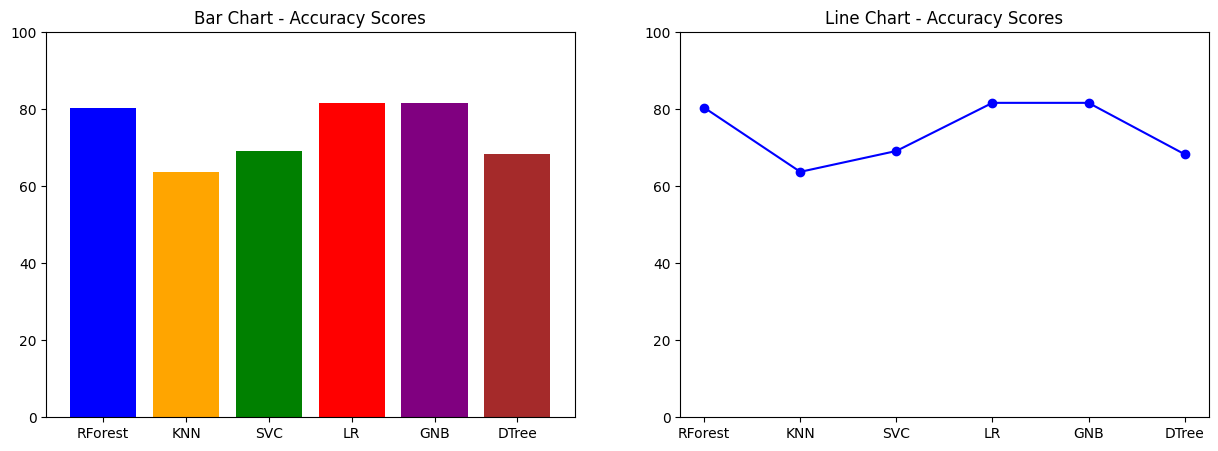

In [70]:

# Accuracy scores
classifiers = ['RForest', 'KNN', 'SVC', 'LR', 'GNB', 'DTree']
accuracy_scores = [80.42, 63.75, 69.17, 81.67, 81.67, 68.33]

# Create a figure with subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Create a bar chart
axs[0].bar(classifiers, accuracy_scores, color=['blue', 'orange', 'green', 'red', 'purple', 'brown'])
axs[0].set_title('Bar Chart - Accuracy Scores')
axs[0].set_ylim(0, 100)

# Create a line chart
axs[1].plot(classifiers, accuracy_scores, marker='o', linestyle='-', color='b')
axs[1].set_title('Line Chart - Accuracy Scores')
axs[1].set_ylim(0, 100)



